In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv("./AAPL_CLOSE",index_col="Date",parse_dates=True)
cisco = pd.read_csv("./CISCO_CLOSE",index_col="Date",parse_dates=True)
ibm = pd.read_csv("./IBM_CLOSE",index_col="Date",parse_dates=True)
amzn = pd.read_csv("./AMZN_CLOSE",index_col="Date",parse_dates=True)

In [3]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)

In [4]:
stocks.columns = ["aapl","cisco","ibm","amzn"]

In [5]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [6]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [8]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [9]:
log_ret = np.log(stocks / stocks.shift(1))

In [10]:
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


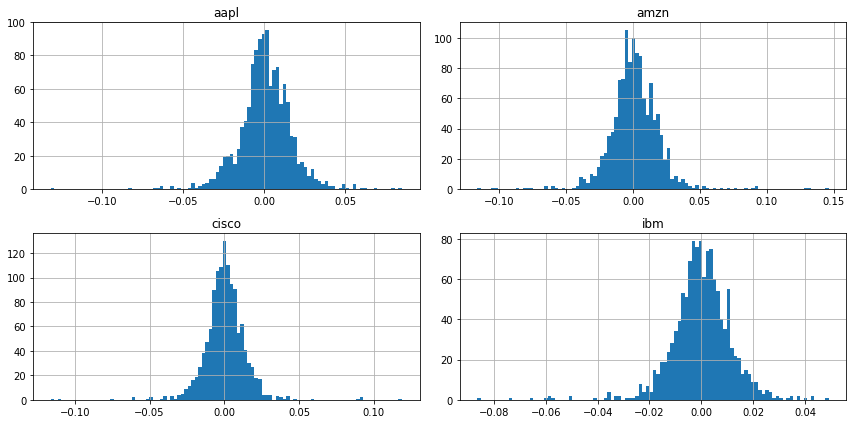

In [11]:
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout()

In [12]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [13]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [14]:
np.random.seed(101)
print(stocks.columns)

weigths = np.array(np.random.random(4))
print("Random Weights")
print(weigths)

print("Rebalance")
weigths = weigths / np.sum(weigths)
print(weigths)

#Expected return

print("Expected portfolio return")
exp_ret = np.sum( (log_ret.mean() * weigths) * 252)
print(exp_ret)

print("Expected volatility")
exp_vol = np.sqrt(np.dot(weigths.T,np.dot(log_ret.cov() * 252,weigths)))      
print(exp_vol)

#Sharp ration
print("Sharp Ration")
SR = exp_ret / exp_vol
print(SR)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected portfolio return
0.15599272049632004
Expected volatility
0.18502649565909488
Sharp Ration
0.8430831483926032


In [15]:
np.random.seed(101)

num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    #Weights
    weigths = np.array(np.random.random(4))
    weigths = weigths / np.sum(weigths)
    
    #Save the weights
    all_weights[ind,:] = weigths

    #Expected return
    ret_arr[ind] = np.sum( (log_ret.mean() * weigths) * 252)

    #Expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weigths.T,np.dot(log_ret.cov() * 252,weigths)))      

    #Sharp ration
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [16]:
sharpe_arr.max()

1.0303260551271067

In [17]:
sharpe_arr.argmax()

1420

In [18]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [25]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

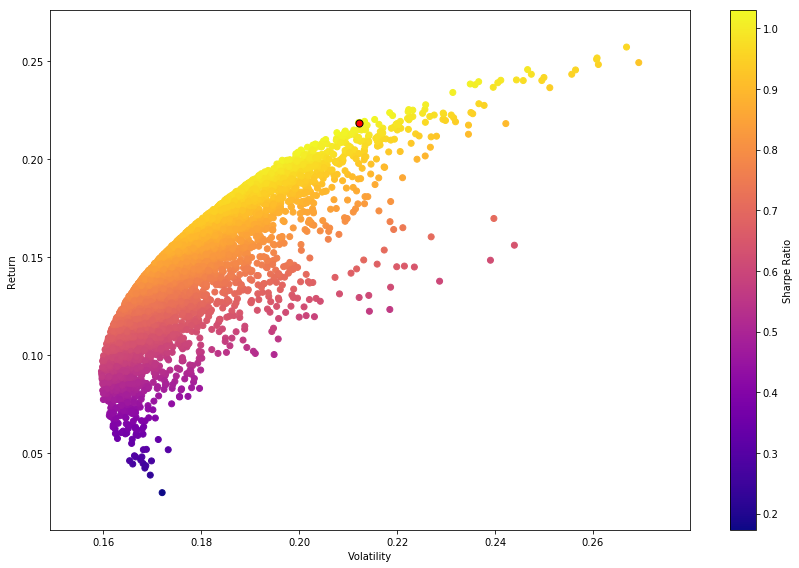

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap="plasma")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.scatter(max_sr_vol,max_sr_ret,c="red",s=50,edgecolors="black")
plt.tight_layout()

In [29]:
def get_vol_ret_sr(weigths):
    weigths = np.array(weigths)
    ret = np.sum(log_ret.mean() * weigths * 252)
    vol = np.sqrt(np.dot(weigths.T,np.dot(log_ret.cov() * 252,weigths)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [30]:
from scipy.optimize import minimize

In [31]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [32]:
def neg_sharp(weigths):
    return get_vol_ret_sr(weigths)[2] * - 1

In [33]:
def check_sum(weigths):
    #Return 0 if sum(weights) = 1
    return np.sum(weigths) - 1

In [34]:
cons = ({"type":"eq","fun":check_sum})

In [35]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [36]:
init_guess = [0.25,0.25,0.25,0.25]

In [37]:
opt_result = minimize(neg_sharp,init_guess,method="SLSQP",bounds=bounds,constraints=cons)

In [38]:
opt_result

     fun: -1.030716870335278
     jac: array([ 5.64157963e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [39]:
opt_result.x

array([2.66289767e-01, 2.04189827e-01, 2.94225365e-17, 5.29520405e-01])

In [40]:
get_vol_ret_sr(opt_result.x)

array([0.21885915, 0.21233683, 1.03071687])

In [41]:
frontier_y = np.linspace(0,0.3,100)

In [43]:
def minimize_vol(weigths):
    return get_vol_ret_sr(weigths)[1]

In [44]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({"type":"eq","fun":check_sum},
          {"type":"eq","fun":lambda w: get_vol_ret_sr(w)[0] - possible_return})
    
    result = minimize(minimize_vol,init_guess,method="SLSQP",bounds=bounds,constraints=cons)
    
    frontier_vol.append(result["fun"])

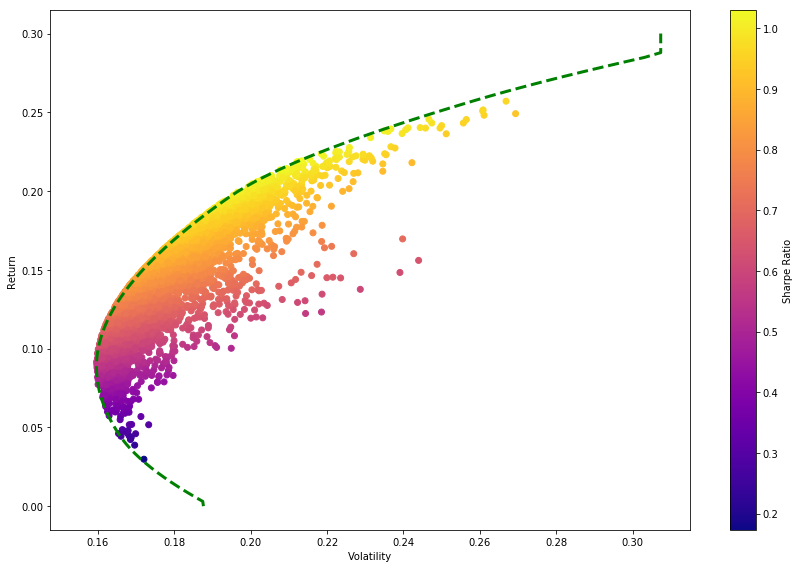

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap="plasma")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")

plt.plot(frontier_vol,frontier_y,"g--",linewidth=3)
plt.tight_layout()